#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import seaborn as sns

#### Reading csv

In [2]:
shell_parallel = pd.read_csv('shell_parallel.csv')
shell_counter = pd.read_csv('shell_counter.csv')
plate_parallel = pd.read_csv('plate_parallel_extra.csv')
plate_counter = pd.read_csv('plate_counter_extra.csv')
tube_parallel = pd.read_csv('tube_parallel.csv')
tube_counter = pd.read_csv('tube_counter.csv')
finned_parallel = pd.read_csv('finned_parallel_extra.csv')
finned_counter = pd.read_csv('finned_counter_extra.csv')

#### Creating a cleaner function

In [3]:
def cleaner(df):
    df = df.dropna(axis=0)
    new_headers = df.iloc[0].values
    df = pd.DataFrame(df.iloc[1:].values, columns=new_headers)
    df = df.reset_index(drop=True)
    df = df.iloc[:, 1:]
    df = df.astype(float)
    df = df.drop(df.columns[4:10], axis=1)
    return df

In [4]:
shell_parallel = cleaner(shell_parallel)
shell_counter = cleaner(shell_counter)
plate_parallel = cleaner(plate_parallel)
plate_counter = cleaner(plate_counter)
tube_parallel = cleaner(tube_parallel)
tube_counter = cleaner(tube_counter)
finned_parallel = cleaner(finned_parallel)
finned_counter = cleaner(finned_counter)

In [5]:
finned_counter.head()

,T1 (°C),T2 (°C),T3 (°C),T4 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW)
0,39.7,43.5,26.9,32.6,2.06,27.0,-1.51,0.0,1.43,1.47
1,39.6,43.4,26.6,32.5,2.04,27.0,-1.54,0.0,1.41,1.48
2,39.6,43.4,26.8,32.5,2.08,28.0,-1.55,0.0,1.42,1.49
3,39.6,43.4,26.6,32.4,2.06,27.0,-1.55,0.0,1.45,1.50
4,39.6,43.4,26.6,32.4,2.07,28.0,-1.55,0.0,1.47,1.51


#### Background Information
Newton's law of cooling (Equation 2)
$$q_s=h\Delta T$$
where $q_s$ is the heat flux $[\frac{W}{m^2}]$ from the surface, $h$ is the convective heat transfer coefficient $[\frac{W}{m^2 \cdot K}]$, and $\Delta T$ is the temperature difference $[K]$ between the surface and bulk fluid. The ability to transfer heat from the medium to the wall, or vice versa, is described by the heat transfer coefficient, $h$, as defined by Eqn. (2). Within the dividing wall, heat is transferred from the hot side to the cold side by thermal conduction, as described by Eqn. (1). At steady state, the following expression equates the heat flux to, through, and from the wall:

$$q=h_1\Delta T_1=\frac{k\Delta T_W}{s}=h_2\Delta T_2=U\Delta T$$ 

$(3)$

where $\Delta T$ values are as defined in Figure 2, $s$ is the thickness of the dividing wall, and $U$ is the overall heat transfer coefficient of the heat exchanger. $U$ characterizes the heat exchanger, and is represented as the sum of a series of thermal resistances:
$$U=\frac{1}{\frac{1}{h_1}+\frac{s}{k}+
\frac{1}{h_2}}$$

$(4)$

Log mean temperature difference, $\Delta T_{LM}$, must be used to represent the driving force. The general formula for LMTD is

$\Delta T_{LM} = \frac{\Delta T_a - \Delta T_b}{ln(\frac{\Delta T_a}{\Delta T_b})}$

where

$\Delta T_a:$ Temperature difference at one end of the heat exchanger.

$\Delta T_b:$ Temperature difference at the other end of the heat exchanger 

For co-current flow log mean temperature difference is:

$\Delta T_{LM}=\frac{(T_{1i}-T_{2i})-(T_{1o}-T_{2o})}{ln(\frac{T_{1i}-T_{2i}}{T_{1o}-T_{2o}})}$

$(5b)$

Subscripts i and o in Eqn. (5b) represent inlet and outlet streams, respectively. Additional considerations are required when the surface areas of the hot and cold side are different in size, as in the case of a tubular heat exchanger. 

The heat transfer rate (heat duty) of a heat exchanger can be calculated with an energy balance on the hot or cold fluid:

$\dot Q_H=\dot m_h \cdot c_{p,h} \cdot (\Delta T)_h$

$\dot Q_c = \dot m_c \cdot c_{p,c} \cdot (\Delta T)_c$

$(6)$

where $\dot m$ is the mass flow rate and $c_p$ is the specific heat capacity. In an ideal heat exchanger without losses,

$\dot Q = - \dot Q_H = \dot Q_C$

Instead use the mean exchanged heat flow, $\dot Q_M$, and mean area, $A_M$, to calculate the overall heat transfer coefficient for a given heat exchanger.

Overall HT Coeff., $U = \frac{\dot Q_M}{A_M \cdot \Delta T_{LM}}$

$\dot Q_M = \frac{|\dot Q_C|+|\dot Q_H|}{2}$

$(9)$

For a tubular heat exchanger, the mean area is given by:

$A_M = \frac{A_{outer} - A_{inner}}{ln(\frac{A_{outer}}{A_{inner}})} = \frac{\pi L (D_{t,o}-D_{t,i})}{ln(\frac{D_{t,o}}{D_t,i})}$

$(10)$

where $D_{t,i}$ represents the inner tube diameter, $D_{t,o}$ is the outer tube diameter, and $L$ is the length of the tube.

#### Effectiveness, $\epsilon$

$\epsilon = \frac{\dot Q_{actual}}{\dot Q_max}=\frac{\dot Q_M}{C_{min}(T_{hi}-T_{Ci})}$

$C_h=\dot m_h c_{p,h}$

$C_C=\dot m_c c_{p,c}$

$C_{min}=min(C_h,C_c)$

where

$\dot Q_{actual}$ is the actual amount of heat transferred by heat exchanger

$\dot Q_{max}$ is the maximum amount of heat that could be transferred if one of the fluids were to be heated or cooled to the temperature of the other fluid at the inlet

$C=\dot m c_p$ represents the heat capacity rate

$C_{min}$ is the minimum heat capacity rate (the smaller of the hot or cold fluid's heat capacity rate)

# Data Analysis Question 1
Experimentally determine the overall heat transfer coefficient (U) and effectiveness (ε) of
each of the four heat exchangers under identical conditions.

#### Quantity Functions

In [6]:
def calculate_Qh(m, c_p, Delta_T):
    return m * c_p * Delta_T

def calculate_Qc(m, c_p, Delta_T):
    return m * c_p * Delta_T

def calculate_QM(Qc,Qh):
    return (np.abs(Qc) + np.abs(Qh))/2

def calculate_LMTD(Delta_Ta, Delta_Tb):
    return (Delta_Ta - Delta_Tb)/(np.log(Delta_Ta/Delta_Tb))

def calculate_cocurrent_LMTD(T_1i, T_2i, T_1o, T_2o):
    return ((T_1i - T_2i) - (T_1o - T_2o)) / np.log((T_1i - T_2i) / (T_1o - T_2o))

def calculate_A_M_tubular(D_to, D_ti, L):
    return (np.pi*L*(D_to - D_ti))/np.log(D_to/D_ti)

def calculate_U(QM, A_M, LMTD):
    return QM/(A_M*LMTD)

#### System Parameters

In [7]:
c_p = 4184 #J/(kg*C) #Specific heat capacity of water

#### Example calculation of overall heat transfer coefficient with shell-tube heat exchanger (both parallel and counter flow)

In [8]:
shell_parallel.head()

,T1 (°C),T2 (°C),T3 (°C),T4 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW)
0,40.0,32.9,15.1,21.5,0.09,24.0,-2.58,2.58,0.0,2.58
1,40.0,32.9,15.1,21.5,0.09,24.0,-2.60,2.56,0.0,2.58
2,40.0,32.9,15.1,21.5,0.09,23.0,-2.60,2.58,0.0,2.59
3,40.0,32.9,15.1,21.6,0.09,24.0,-2.60,2.60,0.0,2.60
4,40.0,32.9,15.1,21.6,0.09,24.0,-2.60,2.62,0.0,2.61


In [9]:
shell_counter.head()

,T1 (°C),T2 (°C),T3 (°C),T4 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW)
0,32.4,40.2,15.5,22.3,0.09,21.0,-2.89,2.75,0.0,2.82
1,32.4,40.2,15.5,22.3,0.09,21.0,-2.90,2.75,0.0,2.83
2,32.4,40.2,15.5,22.3,0.09,21.0,-2.90,2.74,0.0,2.82
3,32.4,40.2,15.5,22.3,0.09,20.0,-2.86,2.74,0.0,2.80
4,32.4,40.2,15.5,22.2,0.09,21.0,-2.88,2.74,0.0,2.81


#### Extract the relevant values
- Cold water inlet temperature
- Hot water inlet temperature
- Cold water outlet temperature
- Hot water outlet temperature
- Qm

#### Start with parallel
Value extraction

In [10]:
cold_inlet_temp = shell_parallel['T3 (°C)'].mean()
hot_inlet_temp = shell_parallel['T1 (°C)'].mean()
cold_outlet_temp = shell_parallel['T4 (°C)'].mean()
hot_outlet_temp = shell_parallel['T2 (°C)'].mean()
QM = shell_parallel['dQm/dt (kW)'].mean() * 1000
A_M = 0.15 #m^2

Compute LMTD and U

In [11]:
Delta_Ta = hot_inlet_temp - cold_outlet_temp
Delta_Tb = hot_outlet_temp - cold_inlet_temp

LMTD = calculate_LMTD(Delta_Ta, Delta_Tb)
U = calculate_U(QM, A_M, LMTD)

print("U (shell heat exchanger with parallel flow):",U,"W/m²·K")

U (shell heat exchanger with parallel flow): 958.0758533838674 W/m²·K


#### Define a general functions to calculate overall heat transfer coefficients for every flow heat exchanger

#### For parallel flows

In [12]:
def parallel_U(df, A_M):
    QM = df['dQm/dt (kW)'].mean() * 1000
    
    first_four_columns = df.iloc[:, :4]
    flat_values = first_four_columns.mean(axis=0).values
    unique_sorted_values = np.sort(np.unique(flat_values))
    
    cold_inlet_temp = unique_sorted_values[0]   
    cold_outlet_temp = unique_sorted_values[1]   
    hot_outlet_temp = unique_sorted_values[2]    
    hot_inlet_temp = unique_sorted_values[3]

    Delta_Ta = hot_inlet_temp - cold_outlet_temp
    Delta_Tb = hot_outlet_temp - cold_inlet_temp

    LMTD = calculate_LMTD(Delta_Ta, Delta_Tb)
    U = calculate_U(QM, A_M, LMTD)
    return np.array([U, cold_inlet_temp, cold_outlet_temp, hot_outlet_temp, hot_inlet_temp, QM])

#### For counter flows

In [13]:
def counter_U(df, A_M):
    QM = df['dQm/dt (kW)'].mean() * 1000
    
    first_four_columns = df.iloc[:, :4]
    flat_values = first_four_columns.mean(axis=0).values
    unique_sorted_values = np.sort(np.unique(flat_values))
    
    cold_inlet_temp = unique_sorted_values[0]   
    cold_outlet_temp = unique_sorted_values[1]   
    hot_outlet_temp = unique_sorted_values[2]    
    hot_inlet_temp = unique_sorted_values[3]

    LMTD = calculate_cocurrent_LMTD(hot_inlet_temp,cold_inlet_temp,hot_outlet_temp,cold_outlet_temp)
    U = calculate_U(QM, A_M, LMTD)
    return np.array([U, cold_inlet_temp, cold_outlet_temp, hot_outlet_temp, hot_inlet_temp, QM])

#### Apply to every heat exchanger

In [14]:
shell_counter_U = counter_U(shell_counter, A_M)
shell_parallel_U = parallel_U(shell_parallel, A_M)
finned_counter_U = counter_U(finned_counter, 2.77)
finned_parallel_U = parallel_U(finned_parallel, 2.77)
plate_counter_U = counter_U(plate_counter, 0.13932)
plate_parallel_U = parallel_U(plate_parallel, 0.13932)
tube_counter_U = counter_U(tube_counter, 0.0698)
tube_parallel_U = parallel_U(tube_parallel, 0.0698)
shell_parallel_U

array([ 958.07585338,   15.23      ,   21.687     ,   33.002     ,
         40.094     , 2599.4       ])

### New Data Frame With Calculated Values

In [15]:
dfQ1 = pd.DataFrame(columns=["U", "T_ci", "T_co", "T_ho", "T_hi", "Q_M"])

data_arrays = [
    shell_counter_U,
    shell_parallel_U,
    finned_counter_U,
    finned_parallel_U,
    plate_counter_U,
    plate_parallel_U,
    tube_counter_U,
    tube_parallel_U
]

dfQ1 = pd.DataFrame(data_arrays, columns=["U", "T_ci", "T_co", "T_ho", "T_hi", "Q_M"])

dfQ1.insert(0, 'Heat Exchanger Type', np.array([
    'Shell Counter', 
    'Shell Parallel',
    'Finned Counter',
    'Finned Parallel',
    'Plate Counter',
    'Plate Parallel',
    'Tube Counter',
    'Tube Parallel'
]))
dfQ1

,Heat Exchanger Type,U,T_ci,T_co,T_ho,T_hi,Q_M
0,Shell Counter,1150.253588,15.351,22.202,32.284,40.139,2820.5
1,Shell Parallel,958.075853,15.230,21.687,33.002,40.094,2599.4
2,Finned Counter,49.486788,26.490,32.596,39.586,43.468,1542.8
3,Finned Parallel,54.429328,26.444,33.438,39.300,43.426,1713.0
4,Plate Counter,3510.638952,21.694,28.938,32.812,41.262,4739.4
5,Plate Parallel,2522.359438,20.420,30.064,31.706,41.986,4076.8
6,Tube Counter,6465.400106,21.821,27.312,30.769,37.904,3706.3
7,Tube Parallel,5447.766559,21.821,27.312,30.769,37.904,3706.3


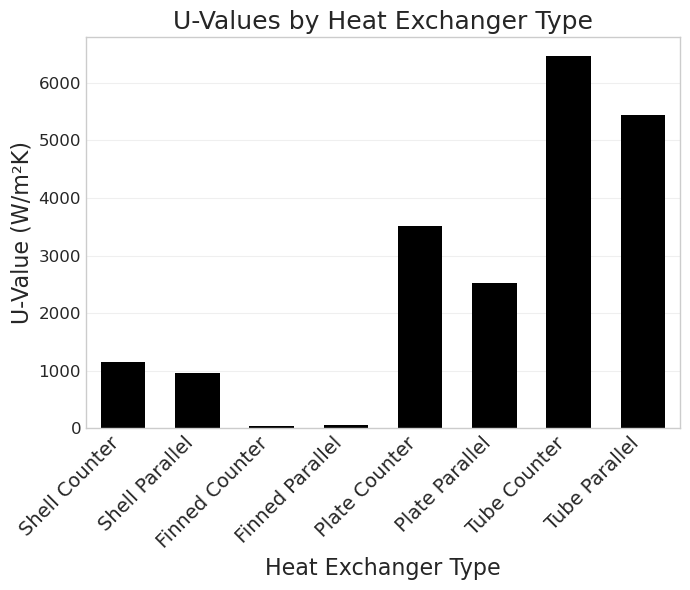

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

# Create a skinnier figure by adjusting the width (reduced from 10 to 7)
plt.figure(figsize=(7, 6))

# Create the bar graph using seaborn with black bars
# Use the 'width' parameter to make bars closer together (default is 0.8)
ax = sns.barplot(data=dfQ1, x="Heat Exchanger Type", y="U", color='black', width=0.6)

# Customize the plot
plt.title("U-Values by Heat Exchanger Type", fontsize=18)
plt.xlabel("Heat Exchanger Type", fontsize=16)
plt.ylabel("U-Value (W/m²K)", fontsize=16)
plt.grid(True, alpha=0.3, axis='y')

# Make x-axis labels bigger
plt.xticks(fontsize=14, rotation=45 if len(dfQ1["Heat Exchanger Type"].unique()) > 4 else 0, ha='right')
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Save the figure to a file
plt.savefig('heat_exchanger_u_values.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Tubular Calculations

In [17]:
# D_ti = 6/1000
# D_to = 13/1000
# L = 3200 /1000

# tube_area = calculate_A_M_tubular(D_to, D_ti, L)
# tube_area

### Effectiveness Calculation

#### Define function

In [18]:
def calculate_effectiveness(Q_M,C_min,T_hi,T_ci):
    return Q_M/(C_min*(T_hi-T_ci))
    
def calculate_C_min(m_dot,c_p):
    return m_dot * c_p

#### System Parameters

In [19]:
c_p = 4184 #Negligible difference at this range of temperatures #But recognize that the hot water c_p is smaller
flow_rates = np.array([313,313,315,315,313,311,277,277]) * 2.78 * 10**-7 #m^3/s
m_dot = flow_rates * 998.2 #kg/s

### Evaluating effectiveness for each heat exchanger

In [20]:
dfQ1['m_dot'] = m_dot

dfQ1['C_min'] = dfQ1['m_dot'].apply(lambda m: calculate_C_min(m, c_p))
dfQ1['effectiveness'] = dfQ1.apply(lambda row: calculate_effectiveness(row['Q_M'], row['C_min'], row['T_hi'], row['T_ci']), axis=1)
dfQ1

,Heat Exchanger Type,U,T_ci,T_co,T_ho,T_hi,Q_M,m_dot,C_min,effectiveness
0,Shell Counter,1150.253588,15.351,22.202,32.284,40.139,2820.5,0.086857,363.411256,0.313102
1,Shell Parallel,958.075853,15.230,21.687,33.002,40.094,2599.4,0.086857,363.411256,0.287676
2,Finned Counter,49.486788,26.490,32.596,39.586,43.468,1542.8,0.087412,365.733373,0.248461
3,Finned Parallel,54.429328,26.444,33.438,39.300,43.426,1713.0,0.087412,365.733373,0.275806
4,Plate Counter,3510.638952,21.694,28.938,32.812,41.262,4739.4,0.086857,363.411256,0.666467
5,Plate Parallel,2522.359438,20.420,30.064,31.706,41.986,4076.8,0.086302,361.089140,0.523523
6,Tube Counter,6465.400106,21.821,27.312,30.769,37.904,3706.3,0.076867,321.613156,0.716539
7,Tube Parallel,5447.766559,21.821,27.312,30.769,37.904,3706.3,0.076867,321.613156,0.716539


# Data Analysis Question 3

### Reading csv's for the tubular counter flow at varying inner flow rates

In [21]:
df350c_300h = pd.read_csv('tube_counter_350c_300h.csv')
df350c_350h = pd.read_csv('tube_counter_350c_350h.csv')
df350c_400h = pd.read_csv('tube_counter_350c_400h.csv')
df350c_200h = pd.read_csv('tube_counter_350c_200h.csv')

df350h_300c = pd.read_csv('tube_counter_350h_300c.csv')
df350h_350c = pd.read_csv('tube_counter_350h_350c.csv')
df350h_400c = pd.read_csv('tube_counter_350h_400c.csv')
df350h_200c = pd.read_csv('tube_counter_350h_200c.csv')

In [22]:
df350c_200h["hot flow (L/hr)"] = 200
df350c_200h["cold flow (L/hr)"] = 350

df350c_300h["hot flow (L/hr)"] = 300
df350c_300h["cold flow (L/hr)"] = 350

df350c_350h["hot flow (L/hr)"] = 350
df350c_350h["cold flow (L/hr)"] = 350

df350c_400h["hot flow (L/hr)"] = 400
df350c_400h["cold flow (L/hr)"] = 350

df350h_200c["hot flow (L/hr)"] = 350
df350h_200c["cold flow (L/hr)"] = 200

df350h_300c["hot flow (L/hr)"] = 350
df350h_300c["cold flow (L/hr)"] = 300

df350h_350c["hot flow (L/hr)"] = 350
df350h_350c["cold flow (L/hr)"] = 350

df350h_400c["hot flow (L/hr)"] = 350
df350h_400c["cold flow (L/hr)"] = 400

In [23]:
df350c_200h["hot flow (m^3/s)"] = df350c_200h["hot flow (L/hr)"] / (1000 * 3600)
df350c_200h["cold flow (m^3/s)"] = df350c_200h["cold flow (L/hr)"] / (1000 * 3600)

df350c_300h["hot flow (m^3/s)"] = df350c_300h["hot flow (L/hr)"] / (1000 * 3600)
df350c_300h["cold flow (m^3/s)"] = df350c_300h["cold flow (L/hr)"] / (1000 * 3600)

df350c_350h["hot flow (m^3/s)"] = df350c_350h["hot flow (L/hr)"] / (1000 * 3600)
df350c_350h["cold flow (m^3/s)"] = df350c_350h["cold flow (L/hr)"] / (1000 * 3600)

df350c_400h["hot flow (m^3/s)"] = df350c_400h["hot flow (L/hr)"] / (1000 * 3600)
df350c_400h["cold flow (m^3/s)"] = df350c_400h["cold flow (L/hr)"] / (1000 * 3600)

df350h_200c["hot flow (m^3/s)"] = df350h_200c["hot flow (L/hr)"] / (1000 * 3600)
df350h_200c["cold flow (m^3/s)"] = df350h_200c["cold flow (L/hr)"] / (1000 * 3600)

df350h_300c["hot flow (m^3/s)"] = df350h_300c["hot flow (L/hr)"] / (1000 * 3600)
df350h_300c["cold flow (m^3/s)"] = df350h_300c["cold flow (L/hr)"] / (1000 * 3600)

df350h_350c["hot flow (m^3/s)"] = df350h_350c["hot flow (L/hr)"] / (1000 * 3600)
df350h_350c["cold flow (m^3/s)"] = df350h_350c["cold flow (L/hr)"] / (1000 * 3600)

df350h_400c["hot flow (m^3/s)"] = df350h_400c["hot flow (L/hr)"] / (1000 * 3600)
df350h_400c["cold flow (m^3/s)"] = df350h_400c["cold flow (L/hr)"] / (1000 * 3600)

In [24]:
dfs = [df350c_200h, df350c_300h, df350c_350h, df350c_400h,
       df350h_200c, df350h_300c, df350h_350c, df350h_400c ]

In [25]:
df350h_400c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),...,dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s)
0,1/30/2025 3:02:15 PM.93,42.6,100,19.4,27.7,38.5,22.5,35.7,25.0,33.6,...,0.09,-69,-23.03,3.91,0,13.47,350,400,0.000097,0.000111
1,1/30/2025 3:02:16 PM.43,42.6,100,19.3,27.7,38.5,22.5,35.7,25.0,33.6,...,0.09,-69,-23.03,3.94,0,13.48,350,400,0.000097,0.000111
2,1/30/2025 3:02:16 PM.94,42.6,100,19.4,27.7,38.5,22.5,35.7,25.0,33.6,...,0.09,-70,-23.03,3.91,0,13.47,350,400,0.000097,0.000111
3,1/30/2025 3:02:17 PM.44,42.6,100,19.2,27.7,38.5,22.5,35.7,25.0,33.6,...,0.09,-69,-23.12,3.93,0,13.52,350,400,0.000097,0.000111
4,1/30/2025 3:02:17 PM.94,42.6,100,19.3,27.7,38.5,22.5,35.7,25.0,33.5,...,0.09,-69,-23.12,3.98,0,13.55,350,400,0.000097,0.000111


For the tubular heat exchanger in counter-current flow configuration:

(a) Identify and report appropiate correlations for predicting the heat transfer coefficients for the inner tube $(h_i)$ and the annular region $(h_0)$. Clearly state the conditions and assumptions under which these correlations are valid (flow regime, flow condition, characteristic length, etc.).

First, investigate the flow regime using $Re$ to classify the flow as laminar or turbulent.

$$Re=\frac{\rho uD}{\mu}=\frac{4\dot m}{\pi D \mu}$$

where

$\dot m = \rho \dot Q$

In [26]:
mu = 0.001 # Pa * s
rho = 1000 # kg / m^3
D_inner = 6 * 10e-3 # m
D_annular = 13 * 10e-3 # m
D_hydraulic = D_annular - D_inner # m

A_i = np.pi * (D_inner ** 2) / 4
A_h = np.pi * ((D_annular ** 2) - (D_inner ** 2)) / 4

In [27]:
for df in dfs:
    u_cold = df["cold flow (m^3/s)"] / A_i
    u_hot = df["hot flow (m^3/s)"] / A_h
    df["Re_cold (inner tube)"] = (rho * u_cold * D_inner) / mu
    df["Re_hot (annular region)"] = (rho * u_hot * D_inner) / mu

In a double-pipe heat exchanger, cold water flows through the inner tube, and hot water flows through the annular region. The heat transfer coefficients $h_i$ (inner tube) and $h_o$ (annular region) are determined using empirical correlations that depend on the flow regime as indicated by $Re$. 

| Regime | Reynolds Number Condition |
|--------|---------------------------|
| Laminar | Re < 2300 |
| Transitional | 2300 < Re < 4000 |
| Turbulent | Re > 4000 |

### Summary of Correlations and Assumptions

| Region | Regime | Correlation | Assumptions |
|--------|--------|-------------|-------------|
| Inner Tube | Laminar | Nu = 3.66 | Constant wall T, fully developed |
| Inner Tube | Turbulent | Nu = 0.023 Re^0.8 Pr^0.4 | Fully developed, smooth tube |
| Annular Region | Laminar | Nu = 3.66 | Same as above |
| Annular Region | Turbulent | Nu = 0.023 Re^0.8 Pr^0.4 | Fully developed, smooth annulus |

#### Note:

Characteristic length
- Inner tube: $D_i$ = 6 mm
- Annular region: $D_h = D_o - D_i$ = 7 mm
Valid for $0.7 < Pr < 160$

In [28]:
def classify_flow_regime(Re):
    if Re < 2300:
        return "Laminar"
    elif Re <= 4000:
        return "Transitional"
    else:
        return "Turbulent"

def classify_flow_in_dataframes(dfs):
    for df in dfs:
        df["Flow Regime (cold)"] = df["Re_cold (inner tube)"].apply(classify_flow_regime)
        df["Flow Regime (hot)"] = df["Re_hot (annular region)"].apply(classify_flow_regime)

In [29]:

classify_flow_in_dataframes(dfs)

# Analysis Question 4

For the tubular heat exchanger,

(a) Experimentally measure the temperature profile along the length of the tubular heat exchanger for both co-current and counter-current flows at a volumetric flow rate of 350 L/hr. 

#### Get the relevant data frames

In [30]:
df350h_350c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),...,dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),Re_cold (inner tube),Re_hot (annular region),Flow Regime (cold),Flow Regime (hot)
0,1/30/2025 2:21:15 PM.19,32.9,48.0,20.8,30.1,35.2,22.5,37.3,25.0,39.6,...,0,4.99,350,350,0.000097,0.000097,2063.119633,558.438397,Laminar,Laminar
1,1/30/2025 2:21:15 PM.69,32.9,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,...,0,4.95,350,350,0.000097,0.000097,2063.119633,558.438397,Laminar,Laminar
2,1/30/2025 2:21:16 PM.19,32.9,48.0,20.8,30.0,35.2,22.5,37.3,25.0,39.7,...,0,4.99,350,350,0.000097,0.000097,2063.119633,558.438397,Laminar,Laminar
3,1/30/2025 2:21:16 PM.69,32.8,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,...,0,5.01,350,350,0.000097,0.000097,2063.119633,558.438397,Laminar,Laminar
4,1/30/2025 2:21:17 PM.19,32.8,48.1,20.8,30.1,35.1,22.5,37.3,25.0,39.6,...,0,5.01,350,350,0.000097,0.000097,2063.119633,558.438397,Laminar,Laminar


In [31]:
tube_parallel_350h_350c = pd.read_csv('tube_parallel_350h_350c.csv')
tube_parallel_350h_350c = tube_parallel_350h_350c.dropna().reset_index(drop=True)
new_headers = tube_parallel_350h_350c.iloc[0]
tube_parallel_350h_350c = tube_parallel_350h_350c[1:]
tube_parallel_350h_350c.columns = new_headers
tube_parallel_350h_350c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW)
1,1/30/2025 3:05:05 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27.1,0.09,-69,-22.99,3.62,0,13.31
2,1/30/2025 3:05:05 PM.93,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.2,27.1,0.08,-69,-22.84,3.69,0,13.26
3,1/30/2025 3:05:06 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.09,-69,-23.01,3.65,0,13.33
4,1/30/2025 3:05:06 PM.94,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.08,-69,-22.93,3.67,0,13.3
5,1/30/2025 3:05:07 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.08,-69,-23.01,3.69,0,13.35


#### Define functions to grab hot and cold water temps

In [32]:
def grab_hot_temps(df):
    df = df.drop(columns="Time")
    t_columns = [col for col in df.columns if col.startswith('T')]
    df = df[t_columns]
    df = df.apply(pd.to_numeric, errors='coerce')
    column_means_series = df.mean()
    df = column_means_series.to_frame().T
    columns_to_extract = [
    "T1 (°C)",
    "T5 (°C)",
    "T7 (°C)",
    "T9 (°C)",
    "T2 (°C)"
]
    df = df[columns_to_extract]
    first_row_series = df.iloc[0]
    hot_temps = first_row_series.to_numpy()
    return hot_temps

def grab_cold_temps(df):
    df = df.drop(columns="Time")
    t_columns = [col for col in df.columns if col.startswith('T')]
    df = df[t_columns]
    df = df.apply(pd.to_numeric, errors='coerce')
    column_means_series = df.mean()
    df = column_means_series.to_frame().T
    columns_to_extract = [
    "T3 (°C)",
    "T6 (°C)",
    "T8 (°C)",
    "T10 (°C)",
    "T4 (°C)"
]
    df = df[columns_to_extract]
    first_row_series = df.iloc[0]
    cold_temps = first_row_series.to_numpy()
    return cold_temps

Getting the temperatures

In [33]:
HOT_counter = grab_hot_temps(df350h_350c)
COLD_counter = grab_cold_temps(df350h_350c)

HOT_parallel = grab_hot_temps(tube_parallel_350h_350c)
COLD_parallel = grab_cold_temps(tube_parallel_350h_350c)
print(HOT_parallel)
print(COLD_parallel)

[42.622 38.722 36.026 34.102 30.3  ]
[19.654 22.776 25.5   27.006 28.45 ]


In [34]:
distances = np.array([0,800,800*2,800*3,800*4]) * (1/1000) #meters
print(distances)

[0.  0.8 1.6 2.4 3.2]


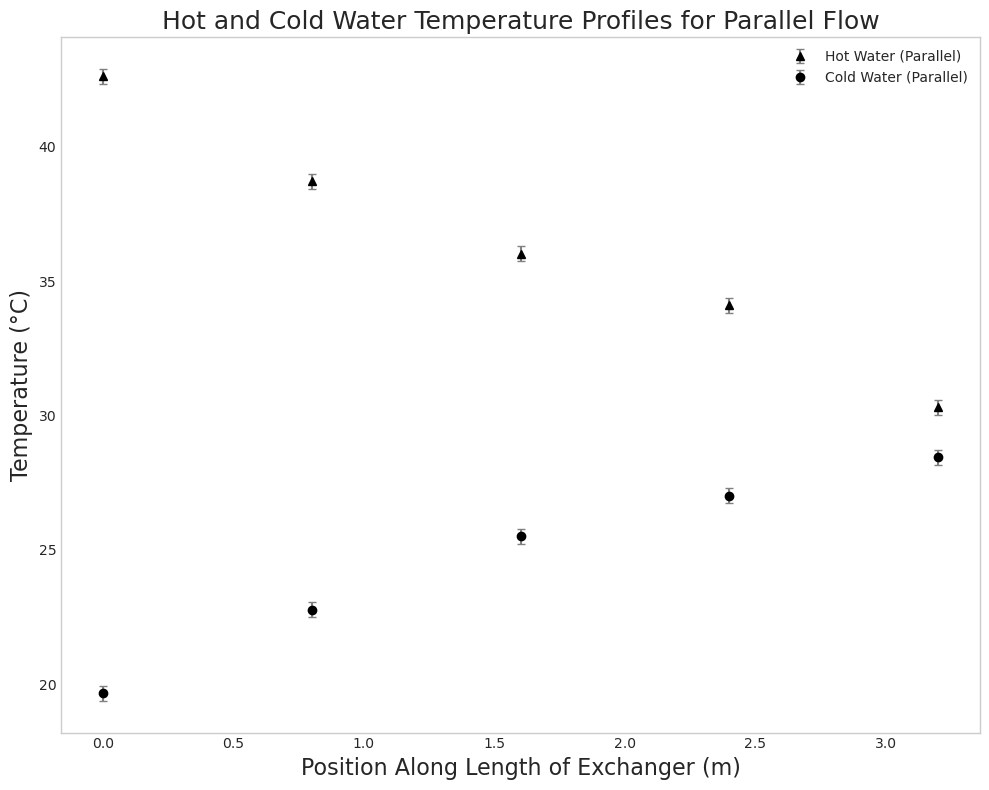

In [35]:
plt.figure(figsize=(10, 8))

plt.errorbar(distances, HOT_parallel, yerr=0.28, label='Hot Water (Parallel)', 
             fmt='^', color="black", capsize=3, ecolor='gray')
plt.errorbar(distances, COLD_parallel, yerr=0.28, label='Cold Water (Parallel)', 
             fmt='o', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Hot and Cold Water Temperature Profiles for Parallel Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

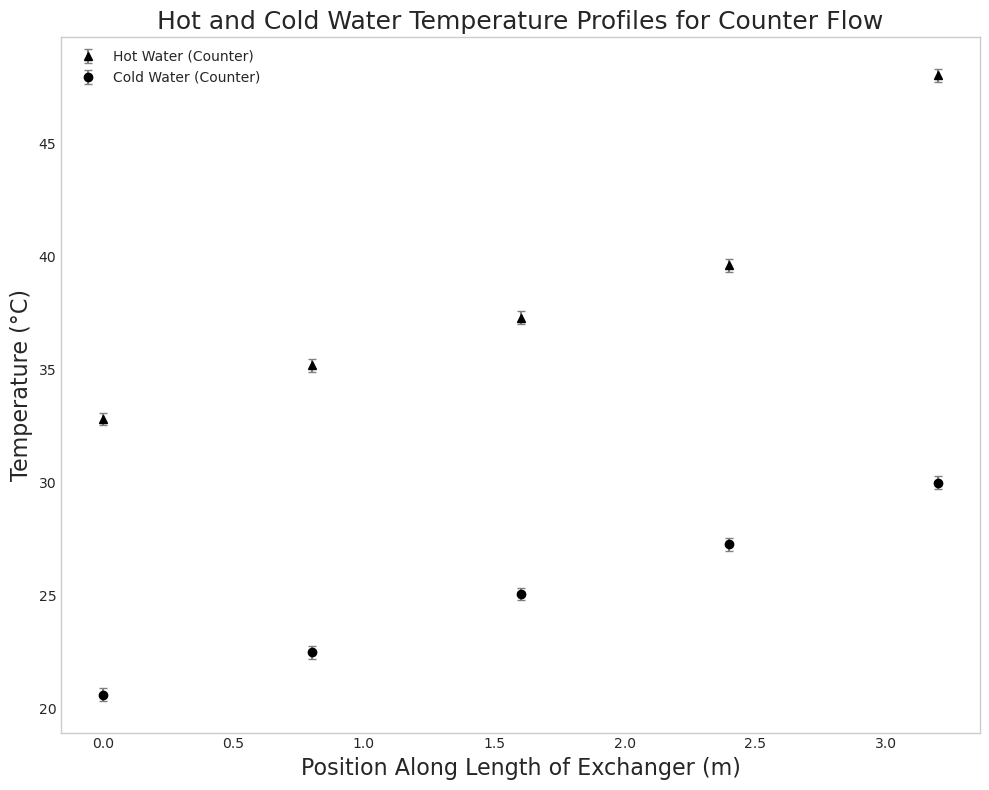

In [36]:
plt.figure(figsize=(10, 8))

plt.errorbar(distances, HOT_counter, yerr=0.28, label='Hot Water (Counter)', 
             fmt='^', color="black", capsize=3, ecolor='gray')
plt.errorbar(distances, COLD_counter, yerr=0.28, label='Cold Water (Counter)', 
             fmt='o', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Hot and Cold Water Temperature Profiles for Counter Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

### Part (b)
Derive the theoretical temperature profiles for both configurations based on energy
balances and assumptions such as negligible heat loss, steady-state operation, and
uniform flow conditions.

#### Assumptions
- Negligible heat loss: Perfect insulation (No heat exchanged with surroundings)
- Steady-state
- Uniform flow conditions: Fluid velocity and temperature are uniform across any given cross section
- Constant specific heats $(c_p)$ remain constant over the temperature range

#### Energy Balance

Hot fluid:

$dq = -\dot m_h c_{p,h} dT_h$ (Eqn. 1)

Cold fluid:

$dq = \pm \dot m_c c_{p,c} dT_c$ (Eqn. 2)

where + is parallel and - is counter

Newton's law of cooling:

$dq = U(T_h-T_c)dA = U(T_h - T_c)Pdx$ (Eqn. 3)

where dA is the differential heat transfer area and P is the tube perimeter

#### Combine (1), (2), and (3)
$\frac{T_{h,o} - T_{c,i}}{T_{h,i} - T_{c,i}} = \exp\left[-UA\left(\frac{1}{C_h} - \frac{1}{C_c}\right)\right]$ (Eq. 4)

w
Where $C_h = \dot{m}_h c_{p,h}$ and $C_c = \dot{m}_c c_{p,c}$

#### Parallel Flow Theoretical Temperature Profile 

$T_h(x) = T_{h,i} - (T_{h,i} - T_{c,i}) \frac{1 + \frac{C_c}{C_h}}{1 - \exp\left[-UA\left(\frac{1}{C_h} + \frac{1}{C_c}\right) \frac{L}{x}\right]}$

$T_c(x) = T_{c,i} + (T_{h,i} - T_{c,i}) \frac{\frac{C_h}{C_c} + 1}{1 - \exp\left[-UA\left(\frac{1}{C_h} + \frac{1}{C_c}\right) \frac{L}{x}\right]}$

#### Counter Flow Theoretical Temperature Profile

$T_h(x) = \frac{(C_c T_{c,i} + C_h T_{h,i}) + (C_c + C_h)T_{h,i}(\exp[-UA(\frac{1}{C_h} + \frac{1}{C_c})\frac{L}{x}] - 1)}{C_c + C_h}$

$T_c(x) = T_{c,i} + \frac{C_h}{C_c}(T_{h,i} - \frac{(C_c T_{c,i} + C_h T_{h,i}) + (C_c + C_h)T_{h,i}(\exp[-UA(\frac{1}{C_h} + \frac{1}{C_c})\frac{L}{x}] - 1)}{C_c + C_h})$

### Part (c)

Compare the theoretical temperature profiles with the experimentally obtained
results, highlighting any deviations and their possible causes.


#### Define functions

In [48]:
def hot_parallel(x, Th_i, Tc_i, C_h, C_c, U,A, L):
    denominator = 1 - np.exp(-U*A * (1/C_h + 1/C_c) * (L/x))
    T_h_parallel = Th_i - (Th_i - Tc_i) * (1 + C_c/C_h) / denominator
    return T_h_parallel

def cold_parallel(x, Tc_i, Th_i, C_h, C_c, U,A, L):
    Ch_Cc_ratio = C_h / C_c
    numerator = Ch_Cc_ratio + 1
    exponent = -U*A * (1/C_h + 1/C_c) * (L/x)
    denominator = 1 - np.exp(exponent)
    T_c_parallel = Tc_i + (Th_i - Tc_i) * (numerator / denominator)
    return T_c_parallel

def hot_counter(x, L, C_h, C_c, Th_i, Tc_i, U):
    A = U * L  
    term1 = (C_c * Tc_i + C_h * Th_i)
    term2 = (C_c + C_h) * Th_i
    exponent = -A * (1/C_h - 1/C_c) * (x / L) # Corrected exponent
    term3 = (np.exp(exponent) - 1)
    T_h_counter = (term1 + term2 * term3) / (C_c + C_h)
    return T_h_counter

def cold_counter(x, L, C_h, C_c, Th_i, Tc_i, U):
    A = U * L  # Total heat transfer area.  Important: A = U*L, since U is defined per unit area.
    term1 = (C_c * Tc_i + C_h * Th_i)
    term2 = (C_c + C_h) * Th_i
    exponent = -A * (1/C_h - 1/C_c) * (x / L) 
    term3 = (np.exp(exponent) - 1)
    T_c_counter = (term1 + term2 * term3) / (C_c + C_h)
    return T_c_counter

#### Hot Parallel flow

Grab the input variables first

In [43]:
tube_parallel_350h_350c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW)
1,1/30/2025 3:05:05 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27.1,0.09,-69,-22.99,3.62,0,13.31
2,1/30/2025 3:05:05 PM.93,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.2,27.1,0.08,-69,-22.84,3.69,0,13.26
3,1/30/2025 3:05:06 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.09,-69,-23.01,3.65,0,13.33
4,1/30/2025 3:05:06 PM.94,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.08,-69,-22.93,3.67,0,13.3
5,1/30/2025 3:05:07 PM.44,42.6,30.3,19.5,28.4,38.8,22.8,36.1,25.5,34.1,27,0.08,-69,-23.01,3.69,0,13.35


In [50]:
m_dot = 350 #m^3/s

C_h = m_dot * c_p
C_c = C_h
U_parallel = 5447.766559
Th_i_parallel = 42.622
Tc_i_parallel = 19.654
L = 3200/1000
A = 0.0698

In [51]:
T_HOTp = hot_parallel(distances, Th_i_parallel, Tc_i_parallel, C_h, C_c, U_parallel ,A, L)
T_HOTp

/tmp/ipykernel_152/1095514529.py:2: RuntimeWarning: divide by zero encountered in divide
  denominator = 1 - np.exp(-U*A * (1/C_h + 1/C_c) * (L/x))


array([-3.31400000e+00, -2.20934217e+04, -4.42064855e+04, -6.63195519e+04,
       -8.84326189e+04])